In [1]:
#install scikit learn by running: !pip install -U scikit-learn 

# the MNIST dataset is also provided with keras :data already splitted in training and terst sets
# for this: install tensorflow using !pip install tensorflow 
# from tensorflow.python import keras
# from keras.datasets import mnist 

#I use the data from sklearn.datasets, which works as well with minimal additional preprocessing

#import data from sklearn
from sklearn.datasets import fetch_openml
import numpy as np

#fetch mnist dataset
mnist = fetch_openml('mnist_784')

In [6]:
### explore the dataset:
# analog to: 'SGD Classification' - 'section 1: Explore the MNIST Dataset' 

mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

**1. Preprocessing the data**

In [7]:
### preprocess the data

#import img_as_float and stats
from skimage import img_as_float


# transform targets into integers
mnist.target = mnist.target.astype(np.int8)

#Assign data to vriables
X, y = mnist['data'], mnist['target']
print(type(y))
print(type(X))
print(" ")

#split the data set into a test set and a training set
X_train_data, X_test_data, y_train, y_test = np.array(X[:60000]), np.array(X[60000:]), np.array(y[:60000]), np.array(y[60000:])

#convert into floats so that the number is between 0 and 1
X_train_data=img_as_float(X_train_data) 
X_test_data=img_as_float(X_test_data)

#normlalizing
from sklearn.preprocessing import scale
X_train_data = scale(X_train_data)

#reshape X train data into a 28X28 arrays format X_train, X_test
X_train = np.empty(shape=(60000,28,28),dtype='int8') 
X_test = np.empty(shape=(60000,28,28),dtype='int8')

for i in range(0,len(X_train_data)):
    X_train[i] = X_train_data[i].reshape(28,28)

for i in range(0,len(X_test_data)):
    X_test[i] = X_test_data[i].reshape(28,28)
    

#Shuffling the training set indexes to avoid that the order of the data impacts the model results
shuffling_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffling_index], y_train[shuffling_index]

#inspect shape 
print("array shape:")
print('X_train: ' + str(X_train.shape))  #training input vectors   ; each individual input vector is of shape 28x28
print('X_train_data: ' + str(X_train_data.shape))
print('Y_train: ' + str(y_train.shape))     #treaining ouput vector    ; each individual output vector is in 1d
print('X_test_data: ' + str(X_test_data.shape))
print('X_test:  '  + str(X_test.shape))  
print('Y_test:  '  + str(y_test.shape))
print(" ")


#inspects datatypes
print("data types:")
print("X_train_data : {}".format(X_train_data.dtype))
print("X_test_data : {}".format(X_test_data.dtype))

print("X_train : {}".format(X_train.dtype))
print("X_test : {}".format(X_test.dtype))
print("y_train : {}".format(y_train.dtype))
print("y_test : {}".format(X_test.dtype))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
 
array shape:
X_train: (60000, 28, 28)
X_train_data: (60000, 784)
Y_train: (60000,)
X_test_data: (10000, 784)
X_test:  (60000, 28, 28)
Y_test:  (10000,)
 
data types:
X_train_data : float64
X_test_data : float64
X_train : int8
X_test : int8
y_train : int8
y_test : int8


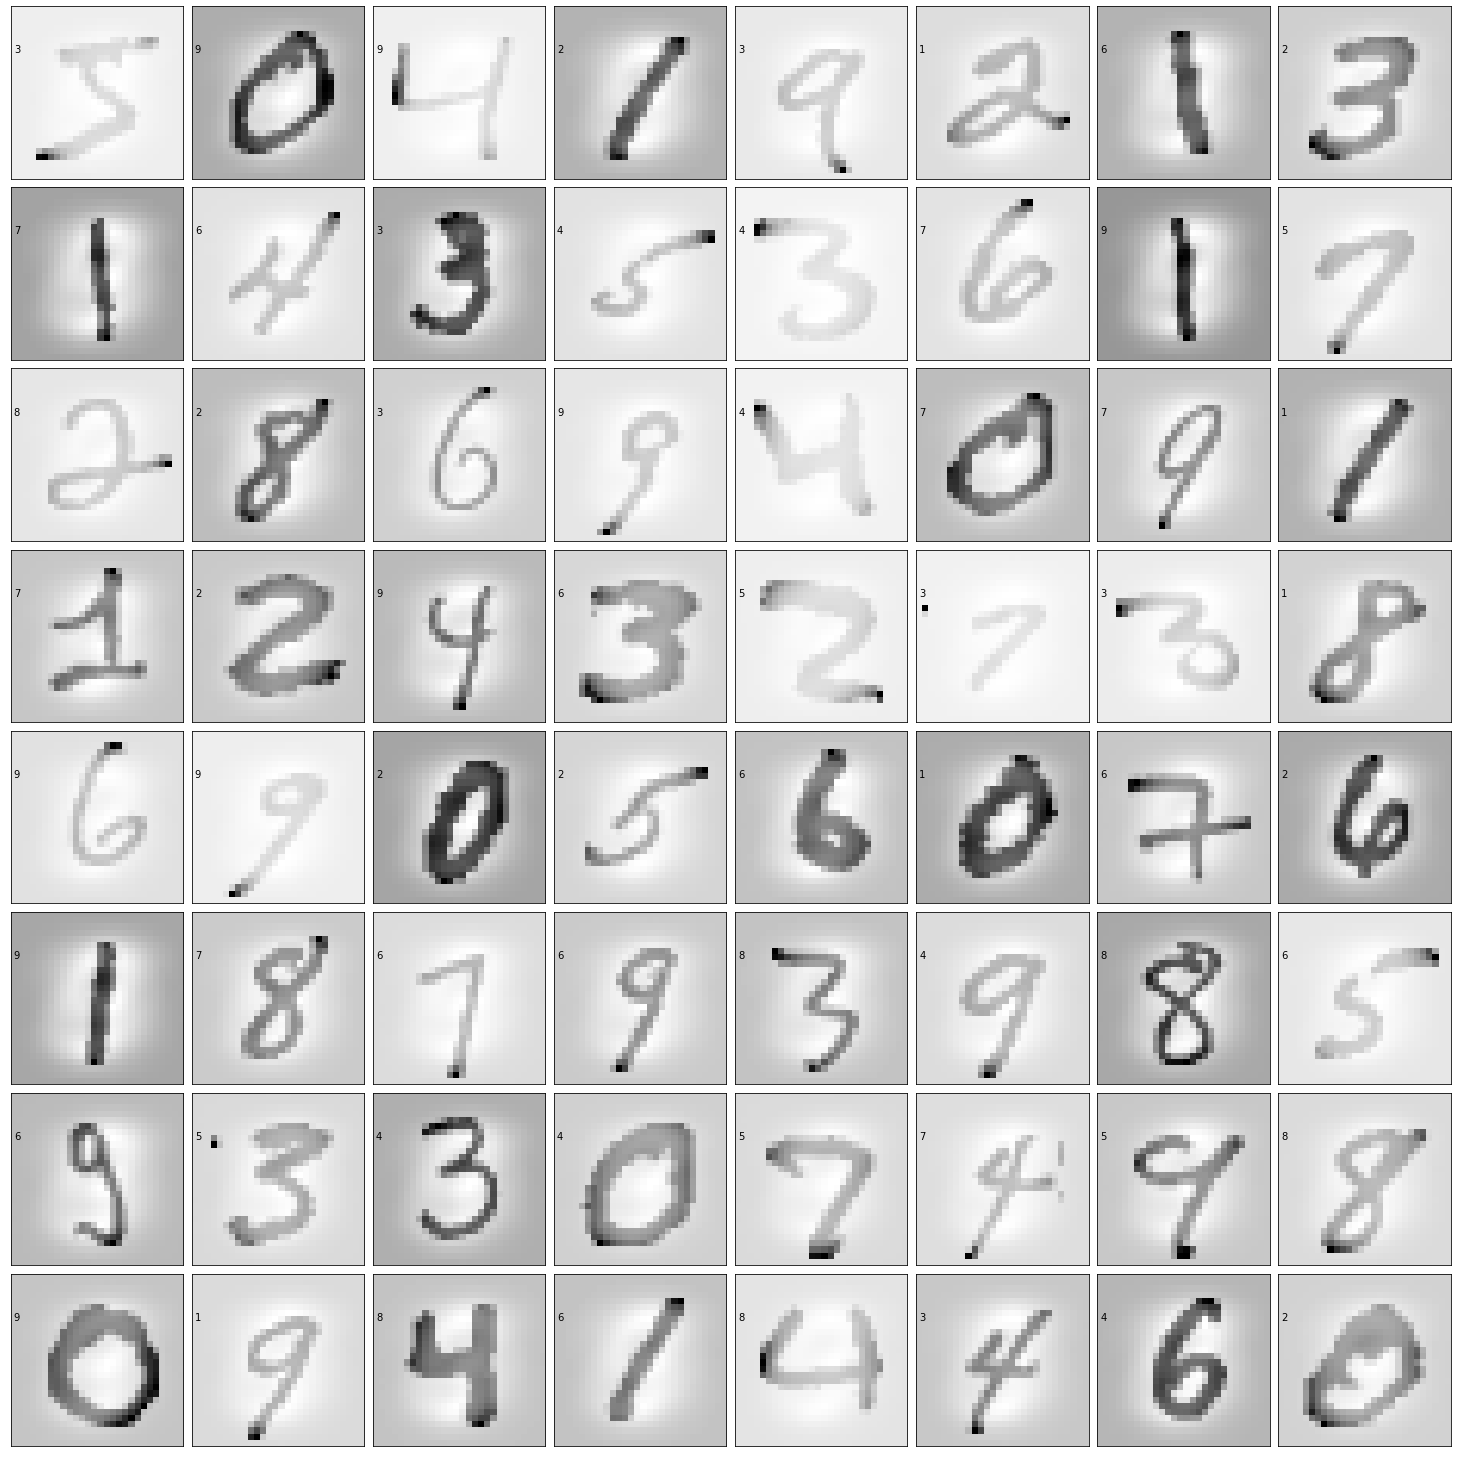

In [5]:
###visualize the digit images with matplotlib

# Import matplotlib
import matplotlib.pyplot as plt

# Figure size (width, height) in inches
fig = plt.figure(figsize=(20, 20))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of first 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position               (and reshaping it into 28x28 pixel format)
    ax.imshow(X_train_data[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

# Show the plot
plt.show()

reduced data (to 2 components):
[[-0.92222032 -4.81481289]
 [ 8.70901231 -7.75418   ]
 [ 2.32823977  9.43090953]
 ...
 [-3.77719838 -3.23074564]
 [ 1.7224499  -4.94828503]
 [-1.42731314 -6.17495792]]


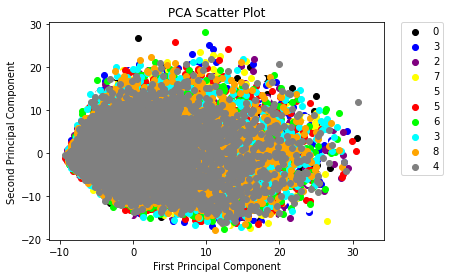

In [8]:
### Visualize with principal component analysis

#PCA Analysis is a Dimensionality Reduction technique: The idea is to find a linear combination 
#of the two variables that contains most of the information. 
#This new variable or “principal component” can replace the two original variables 
# (https://www.datacamp.com/community/tutorials/machine-learning-python).

#import PCA
from sklearn.decomposition import PCA as RandomizedPCA

## Create a Randomized PCA model that takes two components
randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(X_train_data)

# Inspect the shape
reduced_data_rpca.shape

# Print out the data
print("reduced data (to 2 components):")
print(reduced_data_rpca)  #reduced to n = 2  principal components for each vector

##visualize

#set colors for every target value
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

#iterate over colors (which is the same as iterating over a list of targets) first against second principal component
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][y_train == i]
    y = reduced_data_rpca[:, 1][y_train == i]
    plt.scatter(x, y, c=colors[i])
    #set labels and legends
plt.legend(y_train, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

*Interpretations:* The data points group together, but there is some of overlap.

**2. Clustering the data**

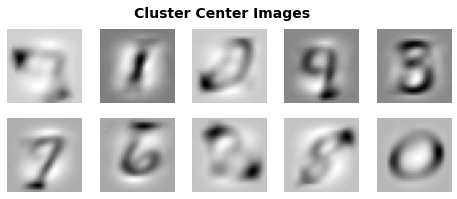

In [9]:
### Clustering the data with K-means model and visualize the data that consitutes the cluster center

# Import the `cluster` module
from sklearn import cluster

##Cluster the data
# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)   #n_clusters = number of centroids the algorithm should generate

# Fit the training data `X_train_data`to the model
clf.fit(X_train_data)


##Visualize the images that form the cluster:
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((28, 28)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

[5 7 1 9 0 1 5 0 9 5 9 9 5 9 1 7 3 0 7 3 5 6 7 8 3 9 0 3 9 7 4 4 4 9 5 2 0
 1 9 1 1 5 3 2 7 4 4 7 3 0 6 7 8 9 7 4 0 1 3 8 0 2 3 2 5 4 9 0 4 9 0 9 2 8
 1 0 4 0 5 5 3 6 2 3 9 0 5 4 6 1 4 6 8 4 6 9 4 5 6 0]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
shape of cluster images: 
(10, 784)


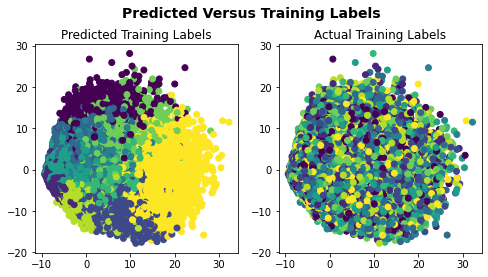

In [10]:
### predict the test target labels and visualize predicted vs. actual labels

# Predict the labels for `X_test`
y_pred=clf.predict(X_test_data)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
print("shape of cluster images: ")
print(clf.cluster_centers_.shape)           #Aligns with number of labels and number of attributes of each image



### vizualize the predicted labels - using PCA

# Import `PCA()`
from sklearn.decomposition import PCA

# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_train_data)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train_data)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

**3. Model performance**

In [11]:
### The confusion matrix and cluster quality metrics

# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))
print(" ")

# cluster quality scores
print("different cluster quality metrics: ")
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test_data, y_pred, metric='euclidean')))

[[  0   0  98   0  18   0   8   1   0 855]
 [  0 773 178   0  81   6  21  26  48   2]
 [ 10   0 424   0  25   3  29 474   0  67]
 [ 23   0 252   6 470  13   1 182   3  60]
 [154   0  61 283   9 167  67  13  98 130]
 [  5   0 162   4 192  14   9  31 240 235]
 [  0   0  66   0   6   0 599  50   4 233]
 [245   2  42  60   1 586   1  35  14  42]
 [ 12   0 180   5 416  29   8  72 165  87]
 [132   0  17 353  24 375   5   3  25  75]]
 
different cluster quality metrics: 
inertia    homo   compl  v-meas     ARI AMI  silhouette
36371576   0.407   0.419   0.413   0.277   0.412    0.025
